### Dataset link: http://brainiac2.mit.edu/isbi_challenge/downloads

0 - membranes, 255 - non-membranes

In [1]:
# Import libraries

import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
import tifffile as tiff
import numpy as np

ROOT_DIR = os.path.abspath("../")
DATASET_NAME = "ISBI2012"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_NAME)
print(os.listdir(DATASET_PATH))

['train-volume.tif', 'train-labels.tif']


In [2]:
# Read data

imgs = tiff.imread('{}/train-volume.tif'.format(DATASET_PATH))
masks = tiff.imread('{}/train-labels.tif'.format(DATASET_PATH))
imgs.shape, masks.shape

((30, 512, 512), (30, 512, 512))

In [3]:
IMG_DIM = (256, 256)

images_rs = []
masks_rs = []

for img, mask in zip(imgs, masks):    
    img = np.expand_dims(resize(img, IMG_DIM), axis=-1)
    mask = np.expand_dims(resize(mask, IMG_DIM).round(), axis=-1)
    
    images_rs.append(img)
    masks_rs.append(mask)
    
images_rs = np.array(images_rs)
masks_rs = np.array(masks_rs)
images_rs.shape, masks_rs.shape

((30, 256, 256, 1), (30, 256, 256, 1))

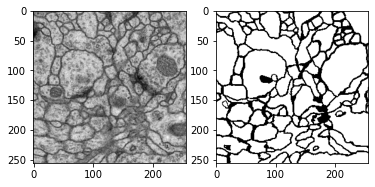

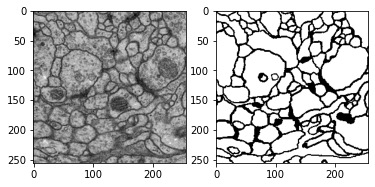

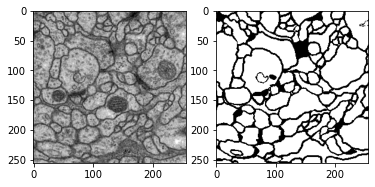

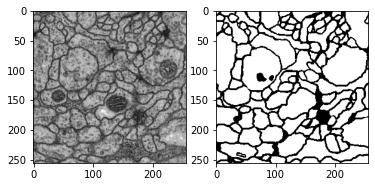

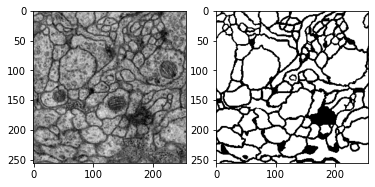

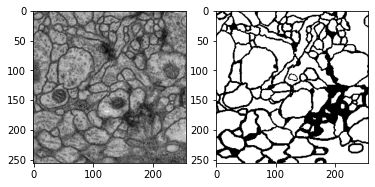

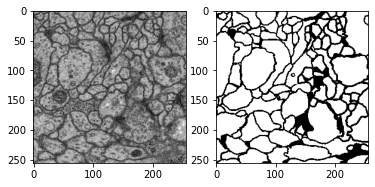

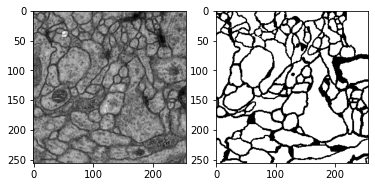

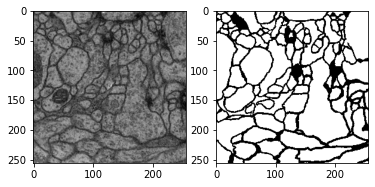

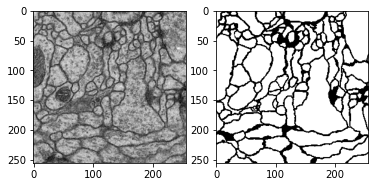

In [4]:
for img, mask in zip(images_rs[:10], masks_rs[:10]):
    
    img = np.squeeze(img, axis=-1)
    mask = np.squeeze(mask, axis=-1)
    
    fig,_ = plt.subplots(nrows=1, ncols=2)
    fig.axes[0].imshow(img, cmap='gray')
    fig.axes[1].imshow(mask, cmap='gray')
    plt.show()
    

In [5]:
images_rs.shape, masks_rs.shape

((30, 256, 256, 1), (30, 256, 256, 1))

In [6]:
np.save("{}/ISBI2012_EM_images.npy".format(DATASET_PATH), images_rs)
np.save("{}/ISBI2012_EM_mask.npy".format(DATASET_PATH), masks_rs)